In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam

In [3]:
train_dir = "D:\\Harshvi_Ddrive\\sem6\\iacv\\project\\dataset\\train" 
test_dir = "D:\\Harshvi_Ddrive\\sem6\\iacv\\project\\dataset\\test"   

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18044\1555729770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotions, y=train_counts, palette='magma')


<Axes: >

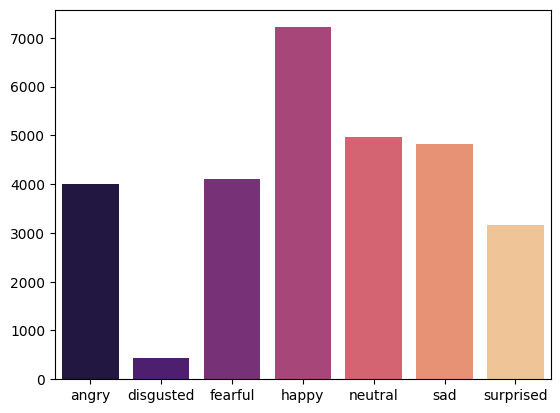

In [3]:

emotions = os.listdir(train_dir)

train_counts = []

for emotion in emotions:
    folder = os.path.join(train_dir, emotion)
    train_counts.append(len(os.listdir(folder)))
    
sns.barplot(x=emotions, y=train_counts, palette='magma')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18044\2339745617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotions, y=test_counts, palette='magma')


<Axes: >

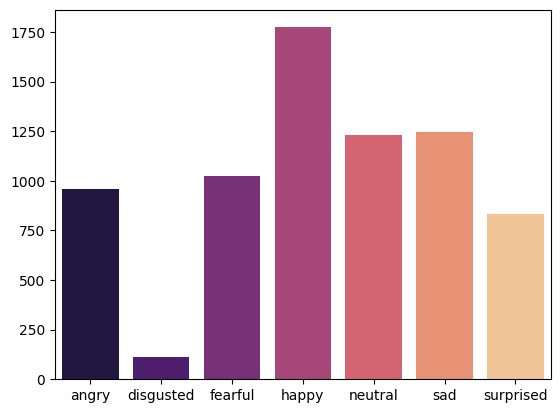

In [4]:
test_counts = []

for emotion in emotions:
    folder = os.path.join(test_dir, emotion)
    test_counts.append(len(os.listdir(folder)))
    
sns.barplot(x=emotions, y=test_counts, palette='magma')

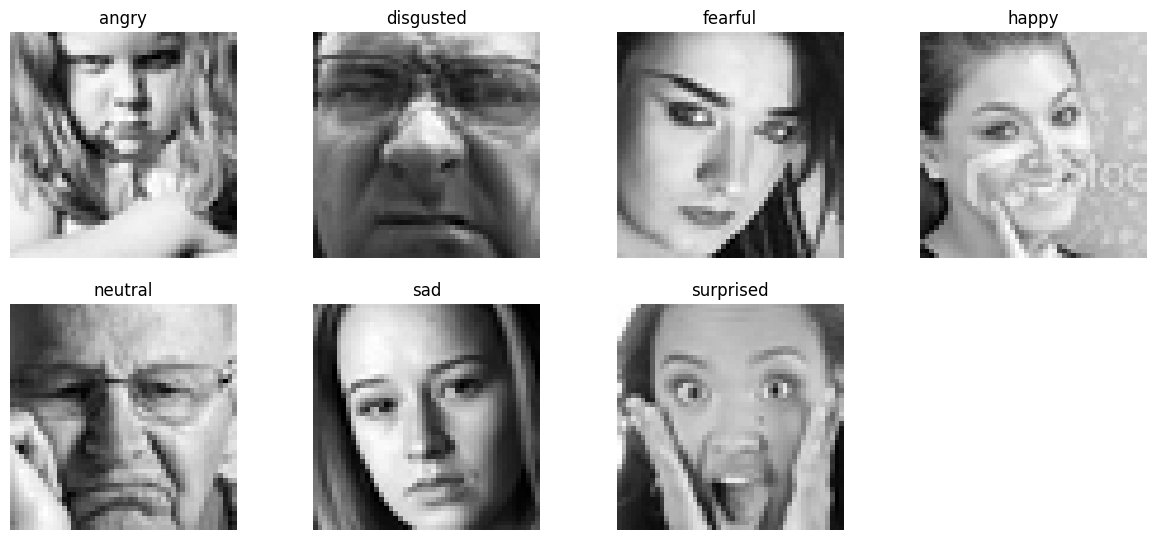

In [5]:
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[42])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [4]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
img_size=48

In [6]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [8]:
model.compile(
  optimizer=Adam(learning_rate=0.001),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [15]:
epochs = 10
batch_size = 64

In [16]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.3768 - loss: 1.6210 - val_accuracy: 0.4616 - val_loss: 1.3875
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.4654 - loss: 1.3862 - val_accuracy: 0.4490 - val_loss: 1.5349
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.5016 - loss: 1.2988 - val_accuracy: 0.5265 - val_loss: 1.2658
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.5366 - loss: 1.2182 - val_accuracy: 0.4707 - val_loss: 1.3427
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.5483 - loss: 1.1893 - val_accuracy: 0.5705 - val_loss: 1.2180
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step - accuracy: 0.5662 - loss: 1.1368 - val_accuracy: 0.5321 - val_loss: 1.2269
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.5730 - loss: 1.1209 - val_accuracy: 0.5803 - val_loss: 1.0955
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.5833 - loss: 1.1047 - val_accu

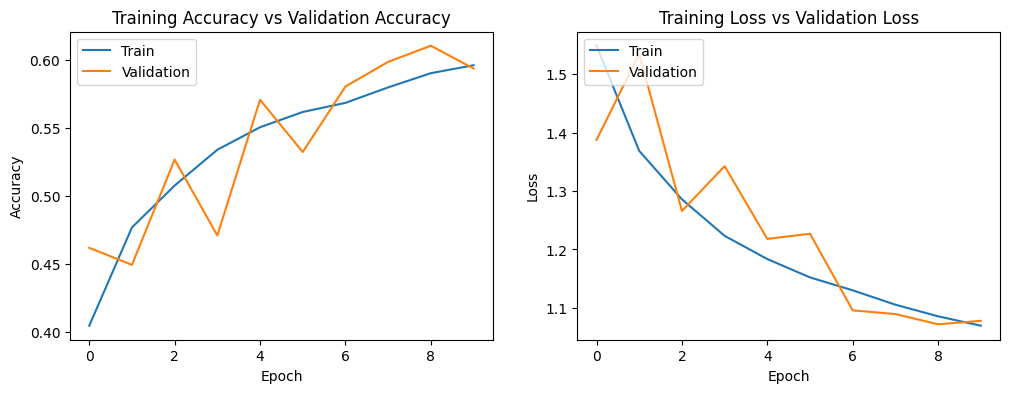

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [23]:
model.save_weights('model_weights_fer.weights.h5')

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Load the saved weights into the model for predictions
model.load_weights('model_weights_fer.weights.h5')



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 58 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height = 48
img_width = 48

# Preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  
    img_array = tf.expand_dims(img_array, 0)  
    return img_array

def predict_emotion_with_image(image_path):
    # Load and display the image
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class = tf.argmax(predictions[0]).numpy()
    
    return predicted_class


def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry', 
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'
               }
    
    return res_dict[predicted_emotion]

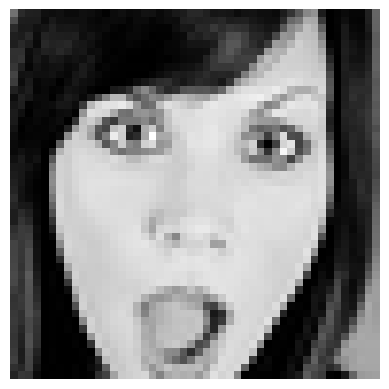

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted emotion class: surprised


In [9]:
image_path = "D:\\Harshvi_Ddrive\\sem6\\iacv\\project\\dataset\\test\\surprised\\im10.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))

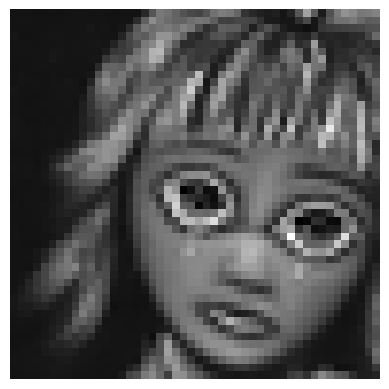

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted emotion class: sad


In [27]:
image_path = "D:\\Harshvi_Ddrive\\sem6\\iacv\\project\\dataset\\test\\sad\\im4.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))

In [ ]:
image_path = "D:\\Harshvi_Ddrive\\sem6\\iacv\\project\\dataset\\test\\happy\\im0.png"

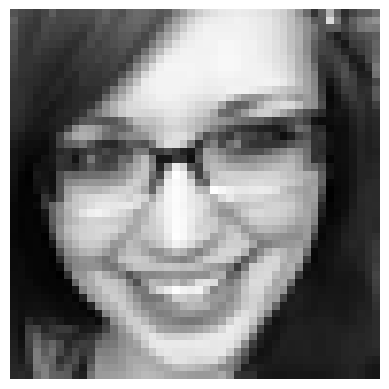

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted emotion class: happy


In [28]:
image_path = "D:\\Harshvi_Ddrive\\sem6\\iacv\\project\\dataset\\test\\happy\\im0.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))